In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
relationship_mtx = pd.read_csv('../data/raw/Wedding Guest Network Data - Connection Matrix.csv', index_col=0)

In [3]:
relationship_mtx

,Richard Pattison,Kathryn Russell,Tim Balzer,Mac Pattison,Ali Pattison,Ella Pattison,Mary Pattison,William Pattison,Wally Pattison,Holly Pattison,...,Rachel Levy,Liz Rhea,Ian Rhea,Sean Martin,Nefeli Chondrogianni,Sean Neel,Jenny Falberg,Pat Jr. Pattison,Morgan Pattison,MC Davault
Richard Pattison,NaN,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,3.0,1.0,1.0,1.0,3.0,2.0,0.0
Kathryn Russell,3.0,NaN,3.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,3.0
Tim Balzer,3.0,3.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,3.0
Mac Pattison,3.0,0.0,0.0,NaN,3.0,3.0,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,0.0
Ali Pattison,3.0,0.0,0.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sean Neel,1.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,3.0,0.0,0.0,0.0
Jenny Falberg,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,NaN,0.0,0.0,0.0
Pat Jr. Pattison,3.0,0.0,0.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,0.0
Morgan Pattison,2.0,0.0,0.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,NaN,0.0


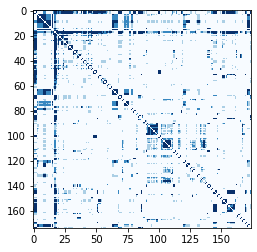

In [4]:
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['font.size'] = 15
plt.imshow(relationship_mtx.iloc[:, :].values, cmap='Blues', interpolation='nearest')
plt.show()

In [5]:
relationship_mtx.sum(axis=0).sort_values(ascending=False)[:50]

Mary Balzer            359.0
Richard Pattison       287.0
Max Balzer             228.0
Kathryn Russell        222.0
Tim Balzer             210.0
Holly Pattison         135.0
Wally Pattison         129.0
Genevieve Geoghan      103.0
Mac Pattison            96.0
Mary Grace Pattison     86.0
Maggie Dunn             81.0
Pat Jr. Pattison        78.0
Pat Pattison            75.0
Marie Pattison          75.0
Oscar Nordness          71.0
Molly Bammerlin         68.0
Ali Pattison            68.0
Suzie Campen            67.0
Tim Campen              67.0
James Rogers            67.0
Morgan Pattison         66.0
Judy Bell               65.0
Christie Ranges         65.0
Daryl Bammerlin         64.0
William Pattison        62.0
Mary Pattison           62.0
Ella Pattison           62.0
Olivia Bammerlin        62.0
Harper Bammerlin        62.0
Cody Vild               62.0
Sloane Fowkes           60.0
Murd Neel               60.0
Bonnie Neel             60.0
Angelo Morales          59.0
Mark Hepburn  

In [6]:
relationship_mtx.sum(axis=0).sort_values(ascending=False)[-50:]

Toni Hepburn            26.0
Troy Nguyen             26.0
Mary Beth Gretta        25.0
Kaitlin Olson           25.0
Erik Ahlgren            25.0
John Gretta             25.0
Maggie McGinley         24.0
Johan Ahlgren           24.0
Anneli Ahlgren          24.0
Claire Meunier          24.0
Sam Waring              24.0
Hamideh Soltanzadeh     23.0
Molly Hamrick           23.0
Sam Nicholson           22.0
Charlie Coolidge        22.0
Daniel Cohen            21.0
Liz Rhea                21.0
Jenny Falberg           21.0
Jukka Aromaa            21.0
Paul Davault            21.0
Cara Touretzky          21.0
Bob Olson               20.0
Tori Iannuzzi           20.0
John Mazza              19.0
Kendra Ruth             19.0
Megan Kesselman         17.0
Maan Sangid             17.0
Astrid Wettstein        17.0
Aaron Hoogstraten       17.0
Mallory Chandler        16.0
Caroline Coolidge       15.0
Jake Sartino            14.0
Leila Thomas            14.0
Haley Vertelney         14.0
Savannah River

In [7]:
guest_list = relationship_mtx.index.values.tolist()

In [8]:
len(guest_list)

174

In [9]:
for g in guest_list:
    for gp in guest_list:
        if gp == g:
            continue

        if relationship_mtx.loc[g, gp] != relationship_mtx.loc[gp, g]:
            print(g)
            print(gp)

In [10]:
graph = nx.Graph(name="Wedding Guest Network")
graph.add_nodes_from(guest_list)

In [11]:
edges = []
for i, g in enumerate(guest_list):
    for gp in guest_list[i+1:]:
        w = relationship_mtx.loc[g, gp]
        if w != 0:
            edges.append((g, gp, w))

In [12]:
len(edges)

2081

In [13]:
graph.add_weighted_edges_from(edges, weight='relationship_strength')

In [14]:
between_centrality = nx.betweenness_centrality(graph)
clusters = nx.clustering(graph, weight='relationship_strength')
centrality = nx.eigenvector_centrality(graph, weight='relationship_strength')

In [15]:
df_analysis = pd.concat((pd.Series(between_centrality).sort_index(), pd.Series(clusters).sort_index(), pd.Series(centrality).sort_index()), axis=1, keys=['between_centrality', 'clusters', 'centrality'])
df_analysis

,between_centrality,clusters,centrality
Aaron Hoogstraten,0.000086,0.439507,0.029839
Abby Nicholson,0.000979,0.379844,0.054393
Addie Neel,0.000706,0.552964,0.087035
Akshay Sriprasad,0.002264,0.288931,0.044553
Alexis Branagan,0.001453,0.326361,0.034892
...,...,...,...
Trish Davis,0.000140,0.842745,0.079579
Troy Nguyen,0.000164,0.532772,0.057152
Wally Pattison,0.025029,0.236292,0.155899
Wendy Bell,0.000028,0.805842,0.073951


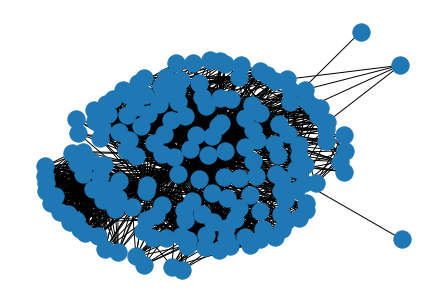

In [17]:
nx.draw(graph, nx.kamada_kawai_layout(graph))#, with_labels=True, node_size=300, node_color='blue', edge_color='black', width=1, font_size=15)

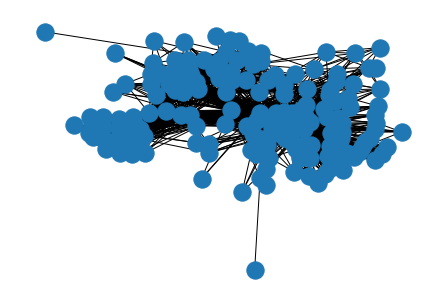

In [18]:
nx.draw(graph, nx.spring_layout(graph))